In [142]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from isochrones import get_ichrone #Instalen este paquete
from scipy.optimize import minimize
from astropy.io import ascii
from isochrones.mist import MISTIsochroneGrid

In [ ]:
#Obtenemos el objeto de isocrona con las magnitudes que necesitemos (la tabla resultante va a contener magnitudes absolutas)
# en este caso estamos obteniendolas de la base de datos MIST
mist = get_ichrone('mist',bands=['SDSS_g', 'SDSS_r', 'SDSS_i'])

In [ ]:
#Para generar una isocrona tenemos que entregar la edad (log), la metalicidad, el modulo de distancia y el valor de extinción en V AV
edad=9
metalicidad=0.0
modulo_de_distancia=10
av=0

iso = mist.isochrone(edad, metalicidad, distance=modulo_de_distancia, AV=av)

#Veamos que columnas tenemos
print(iso.columns)

Index(['eep', 'age', 'feh', 'mass', 'initial_mass', 'radius', 'density',
       'logTeff', 'Teff', 'logg', 'logL', 'Mbol', 'delta_nu', 'nu_max',
       'phase', 'dm_deep', 'SDSS_g_mag', 'SDSS_r_mag', 'SDSS_i_mag'],
      dtype='object')


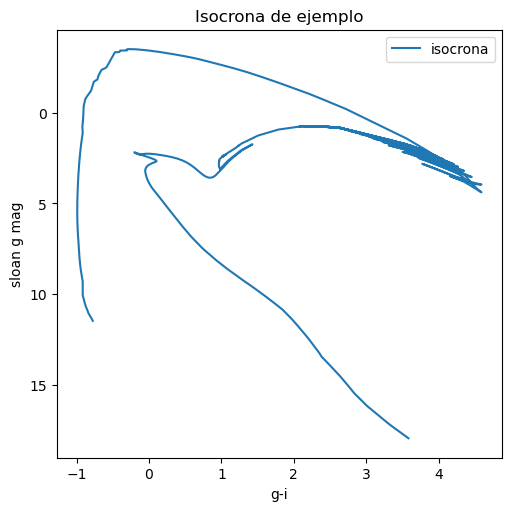

In [70]:
#Plotiemos la isocrona en un diagrama color(g-i)/magnitud(g), pueden probar otras magnitudes y colores 
# (si pueden grafiquen sus fuentes también, las magnitudes tienen que ser absolutas)

plt.figure(figsize=(5,5), layout='constrained')
#plt.plot(color,magnitud,label='Fuentes observadas','.')
plt.plot(iso['SDSS_g_mag']-iso['SDSS_i_mag'],iso['SDSS_g_mag'], label='isocrona')
plt.title('Isocrona de ejemplo')
plt.legend()
plt.ylabel('sloan g mag')
plt.xlabel('g-i')
plt.gca().invert_yaxis()
plt.show()

In [67]:
#Ahora lo que queremos hacer es probar isocronas de distintas edades y ver cual se ajusta mejor a nuestros datos,
# les recomiendo que traten de filtrar las fuentes que no pertenezcan a sus cúmulos y asegurense que las magnitudes
# sean absolutas (las que tienen son aparentes), primero obtengan los modelos de isocronas para sus filtros

mist = get_ichrone('mist',bands=['SDSS_u','SDSS_g', 'SDSS_r', 'SDSS_i']) #Ajusten esto a sus filtros

#Para los valores de metalicidad y AV traten de buscar algún valor para sus cúmulos o valor aproximado, pueden dejar ambas en 0 si gustan
# pero tener un valor real debería mejorar el fit

In [85]:
#Voy a minimizar chi cuadrado para fitear, solo voy a tratar de fitear la mejor edad, pueden agregar más parámetros si
# gustan

metal=0 #Buscar valor teórico, dejar en 0 o agregar a params
dist_mod=10 #Ajustar a su caso
av=0 #Buscar valor teórico, dejar en 0 o agregar a params

#Voy a usar valores de color y magnitud de prueba (para nada sacados de la gráfica de arriba), ustedes pongan los suyos aquí
color = np.array([0, 1, 2, 3]) 
mag = np.array([3, 7 , 10, 14])

def chi2(params):
    age = params #Pueden agregar más paŕametros para fiteas
    iso = mist.isochrone(age, metal, distance=dist_mod, AV=av) #Generamos la isocrona
    iso_interp = np.interp(color, iso['SDSS_g_mag']-iso['SDSS_i_mag'], iso['SDSS_g_mag']) #Interpolamos los valores de color a los nuestros, ajusten los filtros a los que quieran

    return np.sum((mag - iso_interp)**2) #Calculamos chi cuadrado

result = minimize(chi2, x0=[9.0]) #Usamos minimize de numpy para minimizar chi2, en este caso x0 es un valor inicial (usen algún valor teórico para sus cúmulos)
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
print(result) #En este caso x corresponde al valor de edad en logaritmo

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 65.00000000000006
        x: [ 7.778e+00]
      nit: 4
      jac: [ 9.537e-07]
 hess_inv: [[ 4.682e-04]]
     nfev: 28
     njev: 14


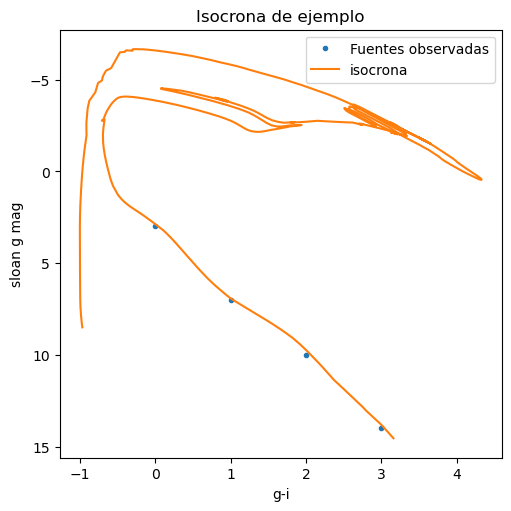

In [86]:
#Probemos que tal se ve el fit
iso = mist.isochrone(7.778, metal, distance=dist_mod, AV=av)

plt.figure(figsize=(5,5), layout='constrained')
plt.plot(color,mag,'.',label='Fuentes observadas')
plt.plot(iso['SDSS_g_mag']-iso['SDSS_i_mag'],iso['SDSS_g_mag'], label='isocrona')
plt.title('Isocrona de ejemplo')
plt.legend()
plt.ylabel('sloan g mag')
plt.xlabel('g-i')
plt.gca().invert_yaxis()
plt.show()

In [176]:
ngc362=ascii.read('NGC362_flux_mag.csv', format='csv')
ngc6405=ascii.read('NGC6405_flux_mag.csv', format='csv')

In [214]:
abs_g=ngc362['new_g']-5*np.log10(9000/10)
abs_r=ngc362['new_i']-5*np.log10(9000/10)

In [229]:
abs_g=ngc6405['new_g']-5*np.log10(490.5622/10)
abs_r=ngc6405['new_i']-5*np.log10(490.5622/10)

In [240]:
np.mean(ngc6405['g_mag']-abs_g)

8.726046615589336

In [250]:
iso = mist.isochrone(7.7, 0.0, distance=10, AV=0.0)

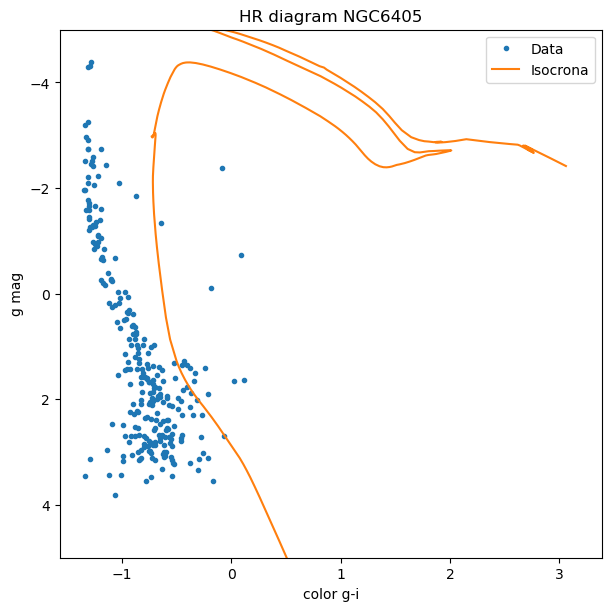

In [259]:
plt.figure(figsize=(6,6), layout='constrained')
plt.plot(abs_g-abs_r,abs_g,'.',label='Data')
plt.plot(iso['SDSS_g_mag']-iso['SDSS_i_mag'],iso['SDSS_g_mag'], label='Isocrona')
plt.legend()
plt.title('HR diagram NGC6405')
plt.xlabel('color g-i')
plt.ylabel('g mag')
plt.gca().invert_yaxis()
plt.ylim(5,-5)
plt.savefig('isocrona.png')
plt.show()

In [243]:
metal=0 #Buscar valor teórico, dejar en 0 o agregar a params
dist_mod=10 #Ajustar a su caso
av=0 #Buscar valor teórico, dejar en 0 o agregar a params

#Voy a usar valores de color y magnitud de prueba (para nada sacados de la gráfica de arriba), ustedes pongan los suyos aquí
color = abs_g-abs_r
mag = abs_g

def chi2(params):
    age = params #Pueden agregar más paŕametros para fiteas
    iso = mist.isochrone(age, metal, distance=dist_mod, AV=av) #Generamos la isocrona
    iso_interp = np.interp(color, iso['SDSS_g_mag']-iso['SDSS_i_mag'], iso['SDSS_g_mag']) #Interpolamos los valores de color a los nuestros, ajusten los filtros a los que quieran

    return np.sum((mag - iso_interp)**2) #Calculamos chi cuadrado

result = minimize(chi2, x0=[7.0]) #Usamos minimize de numpy para minimizar chi2, en este caso x0 es un valor inicial (usen algún valor teórico para sus cúmulos)
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
print(result) #En este caso x corresponde al valor de edad en logaritmo

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 26558.54510997177
        x: [ 6.471e+00]
      nit: 5
      jac: [ 0.000e+00]
 hess_inv: [[ 5.603e-05]]
     nfev: 22
     njev: 11
